In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from constants import *

In [2]:
rruff_db = pd.read_csv('rruff_database_2021_12_25.csv',
                           index_col='Mineral Name',
                           dtype=str,
                           na_filter=False
                          ).transpose()

In [3]:
stages = [ '0', '1', '2', '3a', '3b', '4a', '4b', '5', '7', '10a', '10b' ]
rruff_db_stages = {
    s: pd.read_csv(f'rruff_database_2021_12_25_S{s}.csv',
                       index_col='Mineral Name',
                       dtype=str,
                       na_filter=False
                      ).transpose()
    for s in stages
}
            
# determine all the minerals present in each stage
minerals_present_in_stage = {
    stage: [ mineral for mineral in rruff_db_stages[stage].keys() ]
    for stage in stages
}

# determine which stage a mineral first appeared in
stages_where_minerals_first_appeared = {}
for mineral in rruff_db.keys():
    for stage in stages:
        if mineral in rruff_db_stages[stage].keys():
            stages_where_minerals_first_appeared[mineral] = stage
            break

# determine all the minerals that first appeared in each stage
minerals_first_appeared_in_stage = {
    stage: [ mineral for mineral, stg in stages_where_minerals_first_appeared.items() if stg == stage ]
    for stage in stages
}

In [4]:
symmetry_high = [ 'cubic', 'hexagonal', 'tetragonal', 'trigonal' ]
symmetry_low = [ 'orthorhombic', 'monoclinic', 'triclinic', 'amorphous' ]

first_upper = lambda s: ''.join([s[0].upper(), s[1:]])

no_crystal_system = ''
# calculate the symmetry index of each stage based on the minerals that first appeared in each stage
stage_symmetry_indices_appeared = []
stage_symmetry_low_appeared = []
n_minerals_appeared_in_stage = []
for stage, minerals_appeared in minerals_first_appeared_in_stage.items():
    stage_pop_high = 0
    stage_pop_low = 0
    num_minerals = 0
    for mineral in minerals_appeared:
        crystal_systems = rruff_db_stages[stage][mineral]['Crystal Systems']
        for crystal_system in crystal_systems.replace(', ', '|').split('|'):
            if crystal_system in symmetry_high:
                stage_pop_high += 1
                num_minerals += 1
            elif crystal_system in symmetry_low:
                stage_pop_low += 1
                num_minerals += 1
                
    stage_symmetry_indices_appeared.append(stage_pop_high / stage_pop_low)
    stage_symmetry_low_appeared.append(stage_pop_low)
    n_minerals_appeared_in_stage.append(num_minerals)
    
# calculate the symmetry index of each stage based on the minerals present in each stage
stage_symmetry_indices_present = []
n_minerals_present_in_stage = []
for stage, minerals_present in minerals_present_in_stage.items():
    stage_pop_high = 0
    stage_pop_low = 0
    num_minerals = 0
    for mineral in minerals_present:
        crystal_systems = rruff_db_stages[stage][mineral]['Crystal Systems']
        for crystal_system in crystal_systems.replace(', ', '|').split('|'):
            if crystal_system in symmetry_high:
                stage_pop_high += 1
                num_minerals += 1
            elif crystal_system in symmetry_low:
                stage_pop_low += 1
                num_minerals += 1
                
    stage_symmetry_indices_present.append(stage_pop_high / stage_pop_low)
    n_minerals_present_in_stage.append(num_minerals)
    
# calculate the cumulative symmetry index of each stage based on all the minerals that
# appeared in that stage and all previous ones
stage_symmetry_indices_cumulative = []
n_species_cumulative = []
for i in range(len(stages)):
    symmetry_high_cumulative = 0
    symmetry_low_cumulative = 0
    n_species = 0
    for j in range(i+1):
        symmetry_low_cumulative += stage_symmetry_low_appeared[j]
        symmetry_high_cumulative += stage_symmetry_low_appeared[j] * stage_symmetry_indices_appeared[j]
        n_species += n_minerals_appeared_in_stage[j]
        
    n_species_cumulative.append(n_species)
    stage_symmetry_indices_cumulative.append(symmetry_high_cumulative/symmetry_low_cumulative)

Stage 0:	 5.000
Stage 1:	 0.974
Stage 2:	 1.028
Stage 3a:	 0.702
Stage 3b:	 0.934
Stage 4a:	 0.570
Stage 4b:	 0.462
Stage 5:	 0.471
Stage 7:	 0.371
Stage 10a:	 0.518
Stage 10b:	 0.250


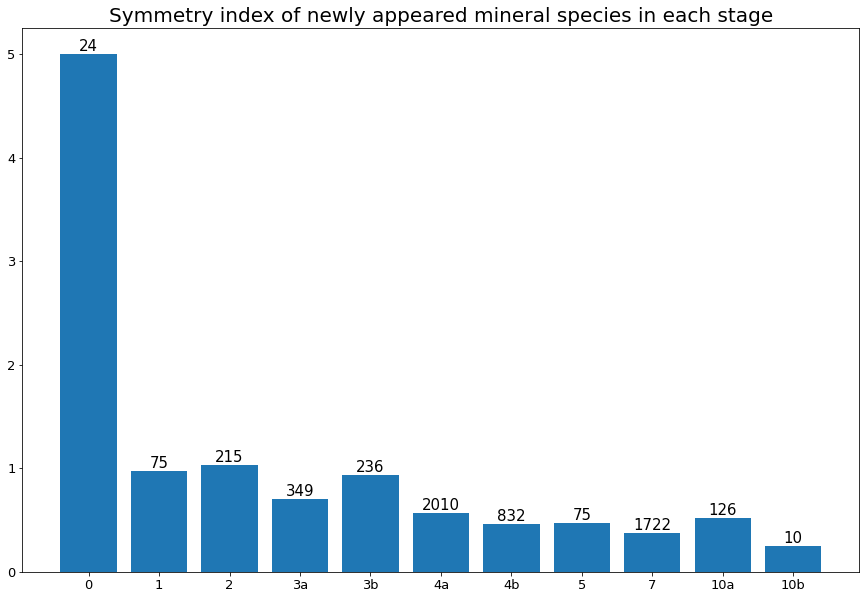

In [5]:
plt.figure(figsize=FIGSIZE)
bars = plt.bar(range(len(stages)), stage_symmetry_indices_appeared)
plt.xticks(range(len(stages)), labels=stages, fontsize=FS_TICK)
plt.yticks(fontsize=FS_TICK)
plt.title('Symmetry index of newly appeared mineral species in each stage', fontsize=FS_TITLE)

[ print(f'Stage {s}:\t {sym:.3f}') for s, sym in zip(stages, stage_symmetry_indices_appeared) ]

for n_minerals, bar in zip(n_minerals_appeared_in_stage, bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{n_minerals}',
             ha='center', va='bottom', fontsize=FS_SAMPLE
            )

plt.savefig('graph_first_appeared_urusov.png')

Stage 0:	 5.000
Stage 1:	 1.268
Stage 2:	 1.183
Stage 3a:	 0.763
Stage 3b:	 0.836
Stage 4a:	 0.622
Stage 4b:	 0.632
Stage 5:	 0.775
Stage 7:	 0.394
Stage 10a:	 0.640
Stage 10b:	 0.489


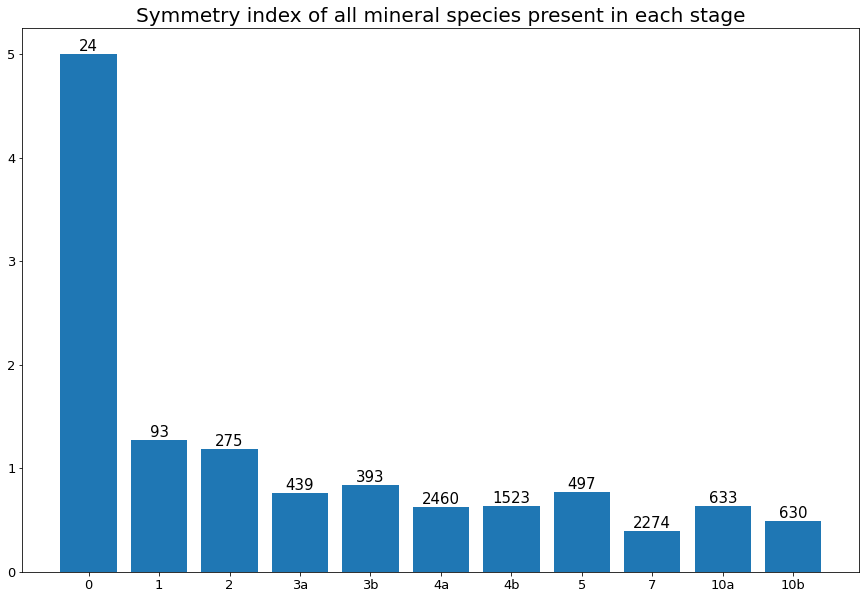

In [6]:
plt.figure(figsize=FIGSIZE)
bars = plt.bar(range(len(stages)), stage_symmetry_indices_present)
plt.xticks(range(len(stages)), labels=stages, fontsize=FS_TICK)
plt.yticks(fontsize=FS_TICK)
plt.title('Symmetry index of all mineral species present in each stage', fontsize=FS_TITLE)

[ print(f'Stage {s}:\t {sym:.3f}') for s, sym in zip(stages, stage_symmetry_indices_present) ]

for n_minerals, bar in zip(n_minerals_present_in_stage, bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{n_minerals}',
             ha='center', va='bottom', fontsize=FS_SAMPLE
            )
    
plt.savefig('graph_present_urusov.png')

Stage 0:	 5.000
Stage 1:	 1.357
Stage 2:	 1.122
Stage 3a:	 0.878
Stage 3b:	 0.893
Stage 4a:	 0.658
Stage 4b:	 0.610
Stage 5:	 0.607
Stage 7:	 0.525
Stage 10a:	 0.525
Stage 10b:	 0.524


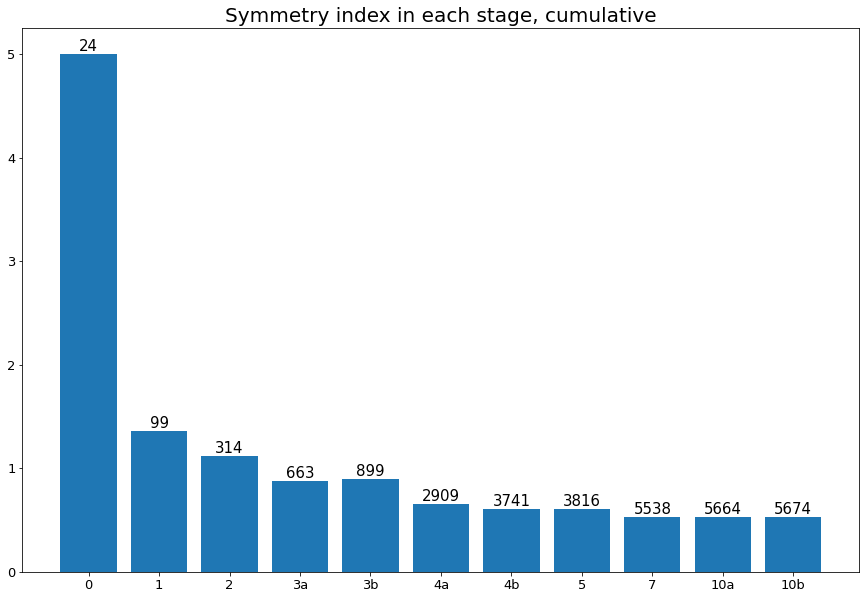

In [7]:
plt.figure(figsize=FIGSIZE)
bars = plt.bar(range(len(stages)), stage_symmetry_indices_cumulative)
plt.xticks(range(len(stages)), labels=stages, fontsize=FS_TICK)
plt.yticks(fontsize=FS_TICK)
plt.title('Symmetry index in each stage, cumulative', fontsize=FS_TITLE)

[ print(f'Stage {s}:\t {sym:.3f}') for s, sym in zip(stages, stage_symmetry_indices_cumulative) ]

for n_minerals, bar in zip(n_species_cumulative, bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{n_minerals}',
             ha='center', va='bottom', fontsize=FS_SAMPLE
            )
    
plt.savefig('graph_cumulative_urusov.png')

In [8]:
s = stage_symmetry_indices_cumulative
n = n_minerals_appeared_in_stage

symmetry_index_change_per_species = np.array([ (s[i+1] - s[i])/n[i] for i in range(0, len(stages)-1) ])
del s, n

stage_transitions = [ f'{stages[i]}-{stages[i+1]}' for i in range(0, len(stages)-1) ]

for s, sc in zip(stage_transitions, symmetry_index_change_per_species):
    print(f'Stage {s}:\t {sc:+.2e}')

Stage 0-1:	 -1.52e-01
Stage 1-2:	 -3.14e-03
Stage 2-3a:	 -1.13e-03
Stage 3a-3b:	 +4.14e-05
Stage 3b-4a:	 -9.96e-04
Stage 4a-4b:	 -2.38e-05
Stage 4b-5:	 -3.59e-06
Stage 5-7:	 -1.09e-03
Stage 7-10a:	 -9.25e-08
Stage 10a-10b:	 -4.69e-06


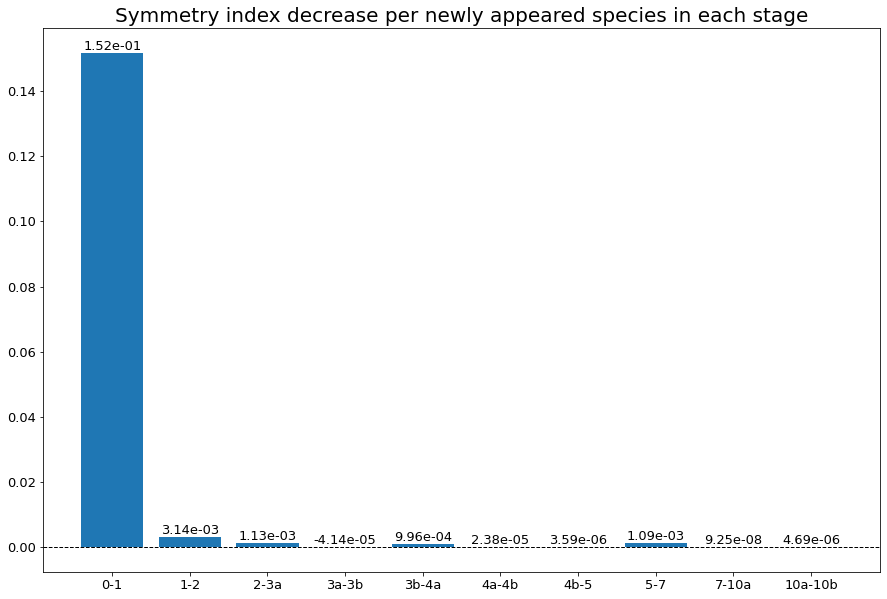

In [9]:
plt.figure(figsize=FIGSIZE)
bars = plt.bar(range(len(stages)-1), -symmetry_index_change_per_species)
plt.xticks(range(len(stages)-1), labels=stage_transitions, fontsize=FS_TICK)
plt.yticks(fontsize=FS_TICK)
plt.title('Symmetry index decrease per newly appeared species in each stage', fontsize=FS_TITLE)

plt.axhline(0, c='k', ls='--', lw=1)
for sc, bar in zip(symmetry_index_change_per_species, bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{-sc:.2e}',
             ha='center', va='bottom', fontsize=13
            )
    
plt.savefig('graph_decrease_per_species_urusov.png')

<ipython-input-10-3e7cb3551668>:2: RuntimeWarning: invalid value encountered in log10
  bars = plt.bar(range(len(stages)-1), np.log10(-symmetry_index_change_per_species))
posx and posy should be finite values
posx and posy should be finite values


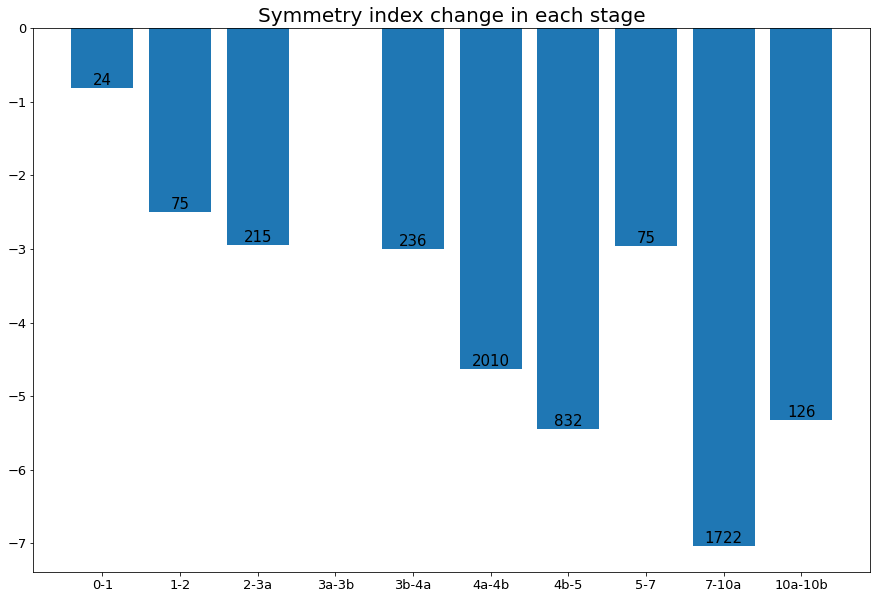

In [10]:
plt.figure(figsize=FIGSIZE)
bars = plt.bar(range(len(stages)-1), np.log10(-symmetry_index_change_per_species))
plt.xticks(range(len(stages)-1), labels=stage_transitions, fontsize=FS_TICK)
plt.yticks(fontsize=FS_TICK)
plt.title('Symmetry index change in each stage', fontsize=FS_TITLE)

for n_minerals, bar in zip(n_minerals_appeared_in_stage, bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{n_minerals}',
             ha='center', va='bottom', fontsize=FS_SAMPLE
            )